# Create figures

This notebook creates figures used in the article on meal optimization.

## Imports and settings

In [1]:
import pandas as pd
from pprint import pprint
import os
import numpy as np
import math
import matplotlib.pyplot as plt

from optimizing_meals import optimize_mealplan, print_results
from classes import Meal, Food

In [2]:
pd.set_option("display.max_rows", 64)
pd.set_option("display.max_columns", 64)
pd.set_option('precision', 1)

FIGSIZE = (9, 3)

In [3]:
if not os.path.exists("figures"):
    os.makedirs("figures")

## Create plot showing goal programming

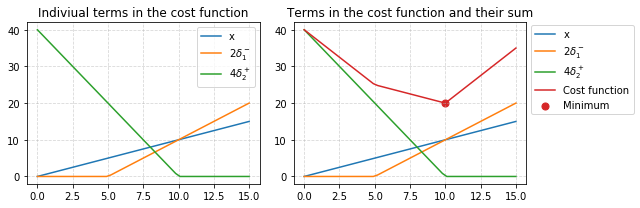

In [4]:
x = np.linspace(0, 15)
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']


plt.figure(figsize=FIGSIZE)

plt.subplot(1, 2, 1)
plt.title("Indiviual terms in the cost function")

plt.plot(x, x, label="x")
cost1 = 2 * np.maximum(0, x - 5)
cost2 = 4 * np.maximum(0, 10 - x)
plt.plot(x, cost1, label="$2 \delta_1^-$")
plt.plot(x, cost2, label="$4 \delta_2^+$")
plt.grid(True, ls="--", alpha=0.5, zorder=5)
plt.legend()

# -----------------------------------------

plt.subplot(1, 2, 2)
plt.title("Terms in the cost function and their sum")

plt.plot(x, x, label="x")
plt.plot(x, cost1, label="$2 \delta_1^-$")
plt.plot(x, cost2, label="$4 \delta_2^+$")
plt.scatter([10], [20], color=COLORS[3], label="Minimum", s=50)

plt.plot(x, x + cost1 + cost2, label="Cost function")
plt.grid(True, ls="--", alpha=0.5, zorder=5)
plt.legend(loc="lower left", bbox_to_anchor=(1.0, 0.4, 0.9, 0.0))

plt.tight_layout()
filename="goal_programming"
if filename:
    plt.savefig(os.path.join("figures", f"{filename}.pdf"))
    plt.savefig(os.path.join("figures", f"{filename}.png"), dpi=300)

plt.show()

## Functions

In [5]:
def plot_results(x, meals, results_data, filename=None):
    """Plot the results"""
    COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    num_meals, num_days = len(x), len(x[0])
    
    
    for day_num in range(num_days):
        
        # Get the quantities
        x_day = [x[i][day_num] for i in range(num_meals)]
        
        # Prepare results
        result = list((m, qnty) for (m, qnty) in zip(meals, x_day))
        price = int(sum(meal.price * qnty for (meal, qnty) in result))
        
        meal_names = [meal.name for (meal, qnty) in result]
        x_ticks = list(range(len(meal_names)))
        
        fig = plt.figure(figsize=FIGSIZE)
        
        # PLOT 1 - Foods and quantities
        ax1 = plt.subplot(1, 3, 1)
        ax1.set_title(f"Day {day_num+1} - Price: {price} NOK")
        
        quantities = [qnty for (meal, qnty) in result]
        colors = [COLORS[2] if meal.discrete else COLORS[0] for (meal, qnty) in result]
        
        ax1.barh(x_ticks, quantities, color=colors, zorder=15, alpha=0.75)
        
        max_quant = int(math.ceil(max(quantities)))
        ax1.set_xticks(list(range(0, max_quant+1)))
        
        ax1.set_yticks(x_ticks)
        ax1.set_yticklabels(meal_names)
        ax1.yaxis.set_tick_params(rotation=0)
        ax1.grid(True, ls="--", alpha=0.5, zorder=5)
        ax1.set_xlabel("Quantities")
        
        # PLOT 2 - Calories
        ax2 = plt.subplot(1, 3, 2)
        calories = [meal.kcal * qnty for (meal, qnty) in result]
        ax2.set_title(f"Total calories: {int(round((sum(calories))))} kcal")
        
        ax2.barh(x_ticks, calories, color=colors, zorder=15, alpha=0.75)
        ax2.set_yticklabels(['' for meal in meal_names])
        ax2.yaxis.set_tick_params(rotation=90)
        
        ax2.grid(True, ls="--", alpha=0.5, zorder=5)
        ax2.set_xlabel("Calories")
        
        # PLOT 3 - Protein
        ax3 = plt.subplot(1, 3, 3)
        protein = [meal.protein * qnty for (meal, qnty) in result]
        ax3.set_title(f"Total protein: {int(round((sum(protein))))} g")
        
        ax3.barh(x_ticks, protein, color=colors, zorder=15, alpha=0.75)
        ax3.set_yticklabels(['' for meal in meal_names])
        ax3.yaxis.set_tick_params(rotation=90)
        
        ax3.grid(True, ls="--", alpha=0.5, zorder=5)
        ax3.set_xlabel("Protein")
        
        plt.tight_layout()
        
        if filename:
            plt.savefig(os.path.join("figures", f"{filename}.pdf"))
            plt.savefig(os.path.join("figures", f"{filename}.png"), dpi=300)
        # Only plot first day
        break

## Data

In [6]:
from data import meals

In [7]:
dietary_constraints = {"kcal": (1800, 1800), "protein": (100, None), "fat": (65 , None)}
meals = list(meals.values())

## Prin the meals to a markdown table

In [8]:
print(' | '.join(["Name", "Discrete", "Grams per base meal", "Description"]))
print(' | '.join(["-----"] * 4))

for meal in meals:
    
    print(' | '.join([meal.name, str(meal.discrete), str(meal.grams), str(meal.foods)]))

Name | Discrete | Grams per base meal | Description
----- | ----- | ----- | -----
mixed nuts | False | 10 | {Food(name='nøtti frutti', protein=13, fat=26, carbs=47, kcal=464, price_per_product=39.7, grams_per_product=350): 10}
yogurt w/ muesli | True | 190 | {Food(name='yoghurt', protein=3.7, fat=3.1, carbs=10.5, kcal=84, price_per_product=17.0, grams_per_product=600): 150, Food(name='musli', protein=9.0, fat=4.8, carbs=63.0, kcal=351, price_per_product=23.1, grams_per_product=750): 40}
chicken w/ sweet&sour | False | 100 | {Food(name='frossen kyllingfilet', protein=19.0, fat=1.8, carbs=0.3, kcal=94, price_per_product=260.0, grams_per_product=2500): 40.7, Food(name='coop sweet and sour', protein=0.6, fat=0.1, carbs=20, kcal=85, price_per_product=14.9, grams_per_product=500): 11.5, Food(name='jasmin ris', protein=2.7, fat=0.1, carbs=31.1, kcal=136, price_per_product=45.8, grams_per_product=1000): 47.8}
hamburger | True | 120 | {Food(name='grovt brød', protein=11.0, fat=4.8, carbs=36.0, 

## Example - constraint on nutrition only

In [9]:
dietary_constraints = {"kcal": (1800, 1800), "protein": (100, None), "fat": (60 , None)}

{'obj_func_value': -0.011908, 'wall_time': 0.089, 'iterations': 598, 'total_price': 89.3}


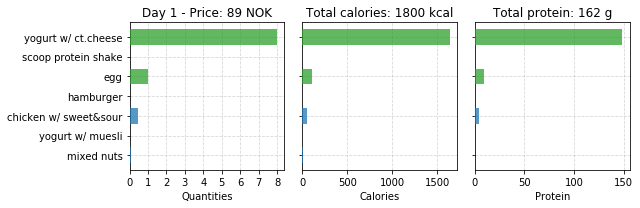

In [10]:
params = {"num_days":1, 
          "num_meals":4,

          "weight_price":-0.01,
          "weight_nutrients":1,
          "weight_range":0,
          "epsilon": 0.1
          }

x, results_data = optimize_mealplan(meals=meals, 
                  meals_limits=None, 
                  dietary_constraints=dietary_constraints, 
                  params=params)

print(results_data)
plot_results(x, meals, results_data, "single_day_constrained_nutrients")

 ## Example - nutrient constraints and price constraint

{'obj_func_value': 0.006101, 'wall_time': 0.013, 'iterations': 6, 'total_price': 45.8}


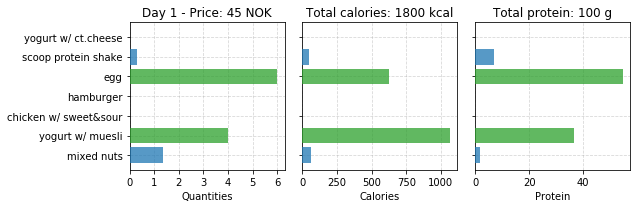

In [11]:
params = {"num_days":1, 
          "num_meals":4,

          "weight_price":0.01,
          "weight_nutrients":1,
          "weight_range":0,
          "epsilon": 0.1
          }

x, results_data = optimize_mealplan(meals=meals, 
                  meals_limits=None, 
                  dietary_constraints=dietary_constraints, 
                  params=params)

print(results_data)
plot_results(x, meals, results_data, "single_day_constrained_nutrients_price")

## Example - nutrient constraints and price constraint and range constraint

{'obj_func_value': 0.296155, 'wall_time': 0.205, 'iterations': 2209, 'total_price': 75.1}


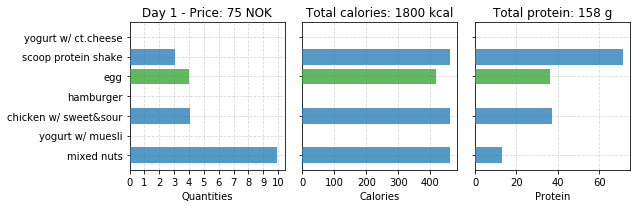

In [12]:
params = {"num_days":1, 
          "num_meals":4,

          "weight_price":0.1,
          "weight_nutrients":2.0,
          "weight_range":0.20,
          "epsilon": 0.1
          }

x, results_data = optimize_mealplan(meals=meals, 
                  meals_limits=None, 
                  dietary_constraints=dietary_constraints, 
                  params=params)

print(results_data)
plot_results(x, meals, results_data, "single_day_constrained_nutrients_price_range")

## Example - several days

In [13]:
num_days = 8

params = {"num_days": num_days, 
          "num_meals": 4,

          "weight_price": 0.1,
          "weight_nutrients": 2.0,
          "weight_range": 0.1,
          "epsilon": 0.001,
          "time_limit_secs": 60
          }

meals_limits = [(None, i+2) for i in range(len(meals))]

In [14]:
# Running the cell block once gives: RuntimeError: Infeasible problem.
# Running it again works. This is strange.

x, results_data = optimize_mealplan(meals=meals, 
                  meals_limits=meals_limits, 
                  dietary_constraints=dietary_constraints, 
                  params=params)

In [15]:
results_data

{'obj_func_value': 0.210535,
 'wall_time': 60.478,
 'iterations': 608908,
 'total_price': 590.2}

In [16]:
def get_kcals(x, meals):
    """Get kcals and protein"""
    num_meals, num_days = len(x), len(x[0])
    
    for day_num in range(num_days):
        
        # Get the quantities
        x_day = [x[i][day_num] for i in range(num_meals)]
        result = list((m, qnty) for (m, qnty) in zip(meals, x_day))
        calories = [meal.kcal * qnty for (meal, qnty) in result]
        yield int(round(sum(calories)))

In [17]:
meals

[Meal(name='mixed nuts', foods={Food(name='nøtti frutti', protein=13, fat=26, carbs=47, kcal=464, price_per_product=39.7, grams_per_product=350): 10}, discrete=False, type=None),
 Meal(name='yogurt w/ muesli', foods={Food(name='yoghurt', protein=3.7, fat=3.1, carbs=10.5, kcal=84, price_per_product=17.0, grams_per_product=600): 150, Food(name='musli', protein=9.0, fat=4.8, carbs=63.0, kcal=351, price_per_product=23.1, grams_per_product=750): 40}, discrete=True, type=None),
 Meal(name='chicken w/ sweet&sour', foods={Food(name='frossen kyllingfilet', protein=19.0, fat=1.8, carbs=0.3, kcal=94, price_per_product=260.0, grams_per_product=2500): 40.7, Food(name='coop sweet and sour', protein=0.6, fat=0.1, carbs=20, kcal=85, price_per_product=14.9, grams_per_product=500): 11.5, Food(name='jasmin ris', protein=2.7, fat=0.1, carbs=31.1, kcal=136, price_per_product=45.8, grams_per_product=1000): 47.8}, discrete=False, type=None),
 Meal(name='hamburger', foods={Food(name='grovt brød', protein=11.0

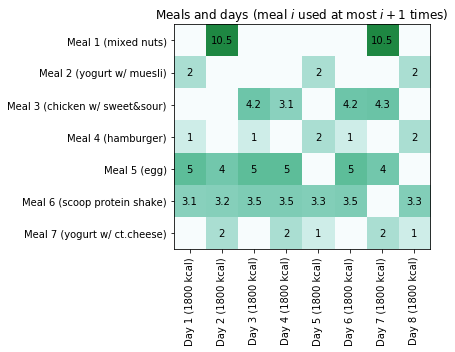

In [18]:
# Get calories for each day
kcals = list(get_kcals(x, meals))

# Convert results to array for vectorized where
x = np.array(x)

plt.figure(figsize=(12, 5))

plt.title("Meals and days (meal $i$ used at most $i+1$ times)")

# Paired, 
x_plot = np.sqrt(x)
plt.imshow(x_plot, alpha=1, cmap=plt.get_cmap("BuGn"),
           vmin=0, vmax=np.max(x_plot) + 1)

days_ticks = list(range(num_days))
plt.xticks(days_ticks, 
           [f"Day {i+1} ({c} kcal)" for i, c in 
            zip(days_ticks, kcals)], 
           rotation=90)

meals_ticks = list(range(len(meals)))
plt.yticks(meals_ticks, 
           [f"Meal {i+1} ({m.name})" for i, m in zip(meals_ticks, meals)])

for (j, i), label in np.ndenumerate(x):
    if label <= 0:
        continue
    label = np.round(label, 1)
    if label % 1 == 0:
        label = int(label)
        
    plt.text(i, j, label, ha='center',va='center')

plt.tight_layout()
filename = "many_days_w_constraints"
plt.savefig(os.path.join("figures", f"{filename}.pdf"))
plt.savefig(os.path.join("figures", f"{filename}.png"), dpi=300)
plt.show()

In [19]:
print_results(x, meals, results_data)

# Meal plan

## Day 1 (price: 61 NOK)

### Meals

- 2 x Meal(name='yogurt w/ muesli', grams=190, foods={150g yoghurt, 40g musli})
- 3.1 x Meal(name='scoop protein shake', grams=175, foods={25g PF whey, 150g lettmelk})
- 1 x Meal(name='hamburger', grams=120, foods={40g grovt brød, 80g burger})
- 5 x Meal(name='egg', grams=70, foods={70g egg})

### Statistics

- Total kcal: 1800 [533, 464, 282, 522]
- Total protein: 152 [18, 72, 16, 46]
- Total fat: 75 [13, 9, 16, 37]
- Total carbs: 126 [82, 27, 16, 1]

## Day 2 (price: 70 NOK)

### Meals

- 10.5 x Meal(name='mixed nuts', grams=10, foods={10g nøtti frutti})
- 2 x Meal(name='yogurt w/ ct.cheese', grams=250, foods={150g yoghurt, 100g cottage cheese})
- 3.2 x Meal(name='scoop protein shake', grams=175, foods={25g PF whey, 150g lettmelk})
- 4 x Meal(name='egg', grams=70, foods={70g egg})

### Statistics

- Total kcal: 1800 [486, 410, 486, 417]
- Total protein: 162 [14, 37, 75, 36]
- Total fat: 79 [27, 13, 9, 30]
- Total carbs: 114 [49, 36, 2